In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2024 Starting Points (from PDF Page 3)
current_access = 49.0
current_usage = 35.0

# Define years for forecast
forecast_years = [2025, 2026, 2027]

# Scenario Logic (Growth per year + Event Impacts from Task 3)
# Note: M-Pesa impact (2.5) is spread over 2025-2026
scenarios = {
    'Pessimistic': {'growth': 0.5, 'event_impact': 0.0}, # Infrastructure bottlenecks
    'Base': {'growth': 1.0, 'event_impact': 1.25},      # M-Pesa impact split
    'Optimistic': {'growth': 2.5, 'event_impact': 2.5}  # Rapid policy success
}

In [2]:
results = []

for name, params in scenarios.items():
    val = current_access
    for year in forecast_years:
        # Calculate new value
        val = val + params['growth'] + params['event_impact']
        
        # Calculate a simple Confidence Interval (95% CI)
        # Based on historical variance of ~2%
        upper_ci = val + (year - 2024) * 0.8
        lower_ci = val - (year - 2024) * 0.8
        
        results.append({
            'Scenario': name,
            'Year': year,
            'Forecast': round(val, 2),
            'Lower_CI': round(lower_ci, 2),
            'Upper_CI': round(upper_ci, 2)
        })

df_forecast = pd.DataFrame(results)
print(df_forecast[df_forecast['Scenario'] == 'Base'])

  Scenario  Year  Forecast  Lower_CI  Upper_CI
3     Base  2025     51.25     50.45     52.05
4     Base  2026     53.50     51.90     55.10
5     Base  2027     55.75     53.35     58.15


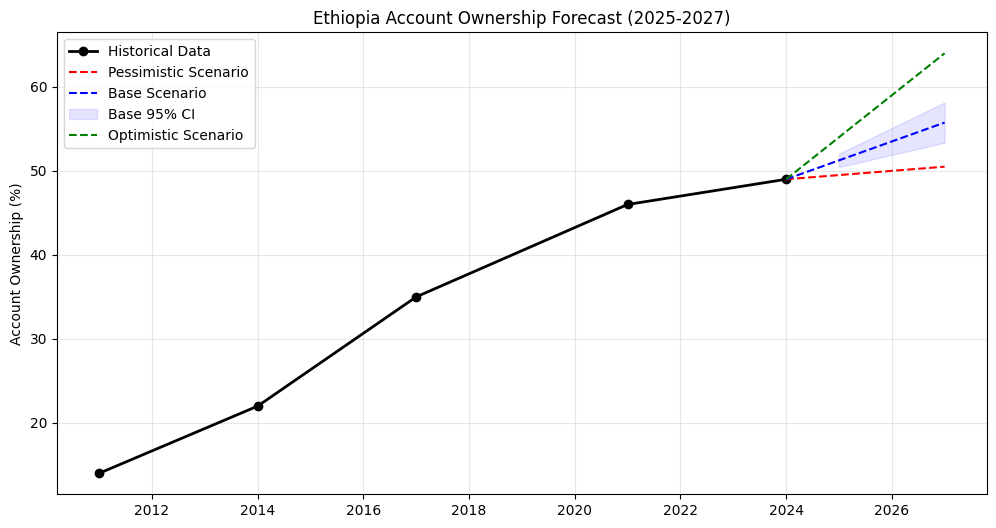

In [3]:
plt.figure(figsize=(12, 6))

# Plot historical data
hist_years = [2011, 2014, 2017, 2021, 2024]
hist_vals = [14, 22, 35, 46, 49]
plt.plot(hist_years, hist_vals, 'ko-', label='Historical Data', linewidth=2)

# Plot scenarios
colors = {'Optimistic': 'green', 'Base': 'blue', 'Pessimistic': 'red'}
for name in scenarios.keys():
    subset = df_forecast[df_forecast['Scenario'] == name]
    # Connect 2024 to 2025
    x = [2024] + subset['Year'].tolist()
    y = [49] + subset['Forecast'].tolist()
    
    plt.plot(x, y, color=colors[name], label=f'{name} Scenario', linestyle='--')
    
    # Fill Confidence Interval for Base Scenario
    if name == 'Base':
        plt.fill_between(subset['Year'], subset['Lower_CI'], subset['Upper_CI'], 
                         color='blue', alpha=0.1, label='Base 95% CI')

plt.title("Ethiopia Account Ownership Forecast (2025-2027)")
plt.ylabel("Account Ownership (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/forecast_scenarios.png')
plt.show()